# Machine Learning and Statistics Project, November 2019
***

## **Submitted by:** Francis Adepoju (G00364694)
***
## __Title:__ Using Descriptive Statistics and Plots to Describe the Boston House Prices Dataset 
***


## Summary of the dataset:
#### The Boston data frame has 506 rows and 14 columns. This data frame contains the following columns:
1. __crim__   - per capita crime rate by town.
2. __zn__     - proportion of residential land zoned for lots over 25,000 sq.ft.
3. __indus__  - proportion of non-retail business acres per town.
4. __chas__   - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. __nox__    - nitrogen oxides concentration (parts per 10 million).
6. __rm__     - average number of rooms per dwelling.
7. __age__    - proportion of owner-occupied units built prior to 1940.
8. __dis__    - weighted mean of distances to five Boston employment centres.
9. __rad__    - index of accessibility to radial highways.
10. __tax__    - full-value property-tax rate per **`$10,000`**.
11. __ptratio__  - pupil-teacher ratio by town.
12. __black__  - `1000 * (Bk - 0.63)^2` where Bk is the proportion of blacks by town.
13. __lstat__  - lower status of the population (percent).
14. __medv__  - median value of owner-occupied homes in **`$1,000`**.

#### NOTE: 
1. The __medv__ variable is the target (y) variable while the effect of the remaining 13 variables on house prices are to be investigated.
2. In this project, we use the Python[1], scipy[2], keras[3], and Jupyter[4] packages to produce a comprehensive description of house prices using the Boston house prices' dataset [5] 
***
***
        



#### Import necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.linalg as sl



#### Load Dataset from my gitHub repository

In [3]:
# Let's use pandas to read this csv file and organise the housing data.
# Load the boston-housing dataset... This is the URL from "raw" version of housing.csv file from my github
#df = pd.read_csv("housingCSV2.csv")
df = pd.read_csv("https://raw.githubusercontent.com/dewaledr/MLearning-Projects/master/housing.csv")
print(df.head())
print(df.tail())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
        crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  0.0  11.93     0  0.573  6.794 

In [17]:
# Investigate the data for missing or non values...
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         134 non-null float64
indus      506 non-null float64
chas       35 non-null float64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [28]:
#To get some basic statistics about our data like mean, median, count etc. we can use .describe() method as shown below:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


***

#### Multi-linear regression using sklearn.
[https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)

In [4]:
# Import linear_model from sklearn.
import sklearn.linear_model as lm

In [5]:
# Create a linear regression model instance.
m = lm.LinearRegression()

Assuming the following linear relationship holds for the house prices and other variables:
$$ medv = a (crim) + b (zn) + c (indus) + d (chas) + e (nox) + f (rm) + g (age) + 
          h (dis) + j (rad) + k (tax) + m (ptratio) + n (black) + p (lstat) $$

In [6]:
# Let's pretend we want to do linear regression on these variables to predict petal width.
x = df[['crim', 'zn', 'indus','chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 
        'black', 'lstat']]

In [7]:
# price relationship.
y = df['medv']

In [8]:
# Ask our model to fit the data.
m.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
# Here's our intercept.
m.intercept_

36.459488385090005

In [10]:
# Here's our coefficients, in order.
m.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [11]:
# See how good our fit is.
m.score(x, y)

0.7406426641094094

### Usind statsmodel for the above operation,

In [12]:
# inport statsmodels.
import statsmodels.api as sm

In [13]:
# Tell statmodels to include an intercept.
xwithc = sm.add_constant(x)

# Create a model.
msm = sm.OLS(y, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 14 Oct 2019   Prob (F-statistic):          6.72e-135
Time:                        20:56:45   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

#### The condition number is large, 15,100. This might indicate that there are strong multicollinearity or other numerical problems... Need to investigate this!

In [14]:
#y

In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. In this situation the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors. That is, a multivariate regression model with collinear predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others.[7]

### Investigating the housing data...
#### Generally, NaN or missing values can be in any form like 0, ? or may be written as “missing” and as observed in our dataset above (chas and zn), there are a lot of  0’s, so we can replace them with NaN to calculate how much data we are missing [6].

In [16]:
# Make a copy first
df2 = df.copy(deep=True)
#print(df2.head())
df2.zn.replace(0, np.nan, inplace=True)
df2.chas.replace(0, np.nan, inplace=True)
#After replacing let’s again use .info() method to see the details about missing values in our dataset:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         134 non-null float64
indus      506 non-null float64
chas       35 non-null float64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


Let’s calculate the percentage of missing values in our dataset. Generally, if there is 20-25% missing values we can impute them with different ways like mean, median or an educated guess by us. But if it’s more than that, it’s better to remove those features otherwise they can affect our result. As we can see below both “zn” and “chas” missing more than 70% data so we will remove both these features.

In [18]:
df2.isnull().sum()/len(df2)*100

crim        0.000000
zn         73.517787
indus       0.000000
chas       93.083004
nox         0.000000
rm          0.000000
age         0.000000
dis         0.000000
rad         0.000000
tax         0.000000
ptratio     0.000000
black       0.000000
lstat       0.000000
medv        0.000000
dtype: float64

In [19]:
df2 = df2.drop("zn", 1)
df2 = df2.drop("chas", 1)

In [20]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [21]:
df2.head()

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# Re-Check percentage of missing values:

In [22]:
df2.isnull().sum()/len(df2)*100

crim       0.0
indus      0.0
nox        0.0
rm         0.0
age        0.0
dis        0.0
rad        0.0
tax        0.0
ptratio    0.0
black      0.0
lstat      0.0
medv       0.0
dtype: float64

In [25]:
#To get some basic statistics about our data like mean, median, count etc. we can use .describe() method as shown below:
df2.describe()

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [29]:
# Let's pretend we want to do linear regression on these variables to predict petal width.
x2 = df2[['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']]

In [30]:
# price relationship.
y2 = df2['medv']

In [31]:
# Ask our model to fit the data.
m.fit(x2, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
# See how good our fit is... This is worse than the first model!!!
m.score(x2, y2)

0.7293219233110855

In [26]:
#Now let’s plot the histogram of all the available features to see the distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f741ac8>,
      dtype=object)

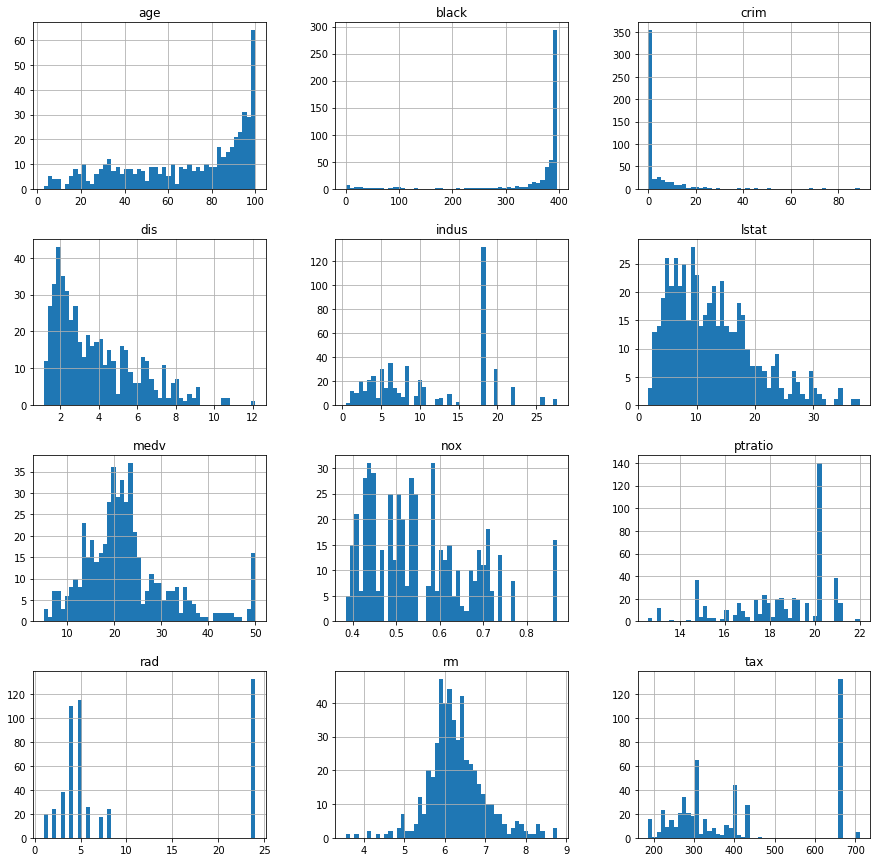

In [33]:
df2.hist(bins=50, figsize=(15, 15))

#### Now let’s check the correlation between all the feature variable and target variable by plotting the heatmap as shown below:

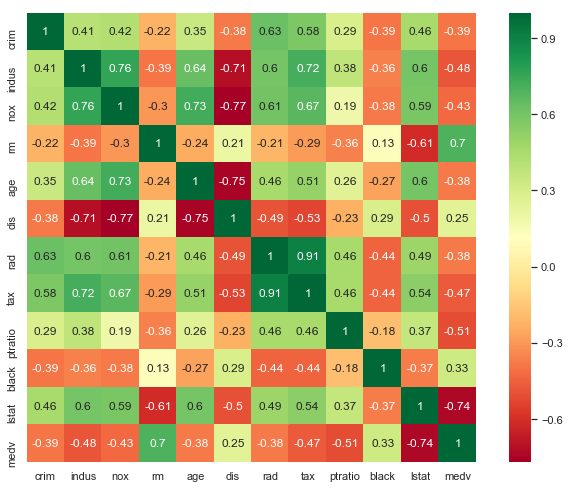

In [35]:
### set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df2.corr().round(2), square=True, cmap='RdYlGn', annot=True)

## Observation from Heat Map...
- From the above correlation plot, we can see that MEDV is strongly correlated to LSTAT, RM
- RAD and TAX are strongly correlated, so we don’t include this in our features together to avoid multicollinearity. Similar to the features DIS and AGE which have a correlation of -0.75. So we will exclude these four features from our features list.


As Scikit learn wants “features” and “target” variables in X and Y respectively. Here __medv__ is our target variable, we can extract features and target arrays from our dataset as shown below. From X we drop the medv column along with other features and in y we keep only medv column:

In [39]:
x3 = df2.drop(["medv","rad","tax","dis","age"], 1).values
y3= df2["medv"].values


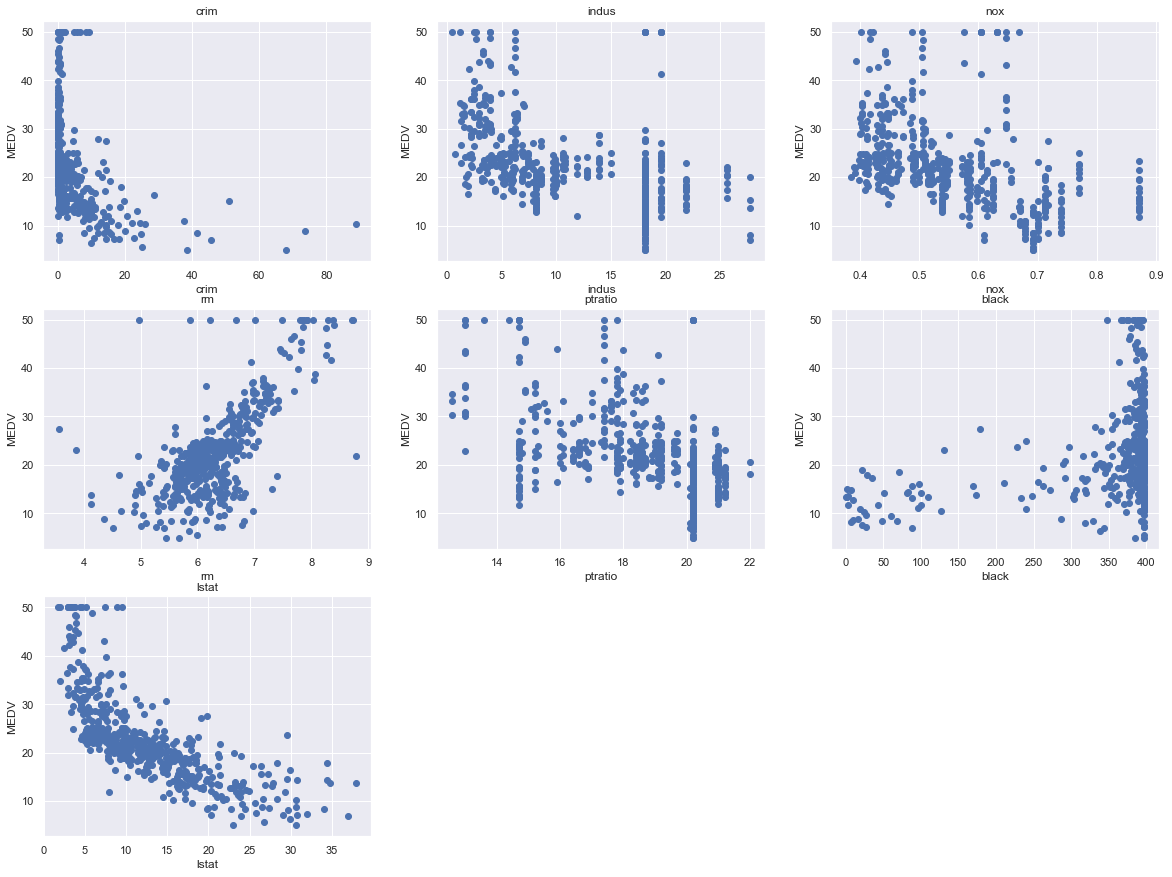

In [41]:
plt.figure(figsize=(20, 15))
features = ['crim','indus','nox','rm','ptratio','black','lstat']
target = df2['medv']
for i, col in enumerate(features):
    plt.subplot(3, len(features)/2 , i+1)
    x3 = df2[col]
    y3 = target
    plt.scatter(x3, y3, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')


From the above visualization, we can conclude that **medv** and **rm** are linearly correlated and medv increase with an increase in rm which is number of rooms and looks like both are following a linear relationship. Also when __lstat__ increases __medv__ or price decreases.

NOTE: Kaggle account opened & housing.csv dataset downloaded - Today 3rd October, 2019
# References:
#### [1] Python Software Foundation: https://www.python.org/
#### [2] SciPy developers: https://www.scipy.org/
#### [3] Keras: https://keras.io/
#### [4] Project Jupyter: https://jupyter.org/
#### [5] Housing Values in Suburbs of Boston: https://www.kaggle.com/c/boston-housing.
#### [6] Online Resources: https://www.weirdgeek.com/2018/12/linear-regression-to-boston-housing-dataset/ 
#### [7] Wiki: https://en.wikipedia.org/wiki/Multicollinearity